Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.datetime import DatetimeFeatures

In [2]:
sklearn.set_config(transform_output="default")

Importing the Dataset

In [3]:
train_df=pd.read_csv("DATA\\train.csv")
test_df=pd.read_csv("DATA\\test.csv")
vald_df=pd.read_csv("DATA\\val.csv")

In [4]:
train_df.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info,9187


In [5]:
train_df.shape

(640, 10)

In [6]:
test_df.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-03-03,Delhi,Cochin,18:15:00,01:35:00,440,1.0,No Info,18916
1,Jet Airways,2019-06-01,Delhi,Cochin,20:55:00,12:35:00,940,1.0,In-flight meal not included,10262
2,Multiple Carriers,2019-06-06,Delhi,Cochin,07:05:00,16:10:00,545,1.0,No Info,9646
3,Air India,2019-03-24,Kolkata,Banglore,16:50:00,18:30:00,1540,1.0,No Info,14641
4,Multiple Carriers,2019-05-27,Delhi,Cochin,10:20:00,19:00:00,520,1.0,No Info,9794


In [7]:
test_df.shape

(200, 10)

In [ ]:
vald_df.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-06-01,Delhi,Cochin,05:15:00,19:15:00,2280,3.0,No Info,10703
1,Air India,2019-03-03,Delhi,Cochin,20:00:00,19:15:00,1395,2.0,No Info,17266
2,Air India,2019-03-06,Mumbai,Hyderabad,05:55:00,22:00:00,965,1.0,No Info,10366
3,Goair,2019-06-09,Kolkata,Banglore,16:40:00,00:15:00,455,1.0,No Info,9495
4,Jet Airways,2019-06-03,Delhi,Cochin,20:55:00,19:00:00,1325,1.0,No Info,14714


In [9]:
vald_df.shape

(160, 10)

Spliting the Dataframes

In [10]:
def train_test(data):
    X=data.drop('price',axis=1)
    y=data.price
    return X,y

In [11]:
X_train,y_train=train_test(train_df)

In [ ]:
X_train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info
...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info
636,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info
637,Indigo,2019-05-15,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info
638,Multiple Carriers,2019-05-15,Delhi,Cochin,08:45:00,21:00:00,735,1.0,No Info


In [13]:
y_train

0       4995
1       8372
2       6117
3       7770
4       9187
       ...  
635     4282
636    13067
637     4423
638     7670
639    10844
Name: price, Length: 640, dtype: int64

In [14]:
X_test,y_test=train_test(test_df)
print(X_test.shape,y_test.shape)

(200, 9) (200,)


In [15]:
X_val,y_val=train_test(vald_df)
print(X_val.shape,y_val.shape)

(160, 9) (160,)


Data Preprocessing

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 45.1+ KB


In [17]:
dt_cols=['date_of_journey','dep_time','arrival_time']
num_cols=['duration','total_stops']
cat_cols=[i for i in X_train if i not in dt_cols and i not in num_cols]

In [18]:
print(dt_cols)
print(num_cols)
print(cat_cols)

['date_of_journey', 'dep_time', 'arrival_time']
['duration', 'total_stops']
['airline', 'source', 'destination', 'additional_info']


In [19]:
num_pipe=Pipeline(steps=[
("Imputer",SimpleImputer(strategy="median")),
("Scaler",StandardScaler())
    ])

In [20]:
cat_pipe=Pipeline(steps=[
    ("Imputer",SimpleImputer(strategy="most_frequent")),
    ("Encoder",OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

In [21]:
doj_pipe=Pipeline(steps=[
    ("Imputer",SimpleImputer(strategy="most_frequent")),
    ("Extractor",DatetimeFeatures(features_to_extract=["month","week","day_of_week","day_of_month"],format="mixed")),
    ("Scaler",StandardScaler())
])
time_pipe=Pipeline(steps=[
    ("Imputer",SimpleImputer(strategy="most_frequent")),
    ("Extractor",DatetimeFeatures(features_to_extract=["hour","minute"],format="mixed")),
    ("Scaler",StandardScaler())
])

In [22]:
preprocessor=ColumnTransformer(transformers=[
    ("Num",num_pipe,num_cols),
    ("Cat",cat_pipe,cat_cols),
    ("doj",doj_pipe,["date_of_journey"]),
    ("time",time_pipe,["dep_time", "arrival_time"])
])

In [23]:
preprocessor.fit_transform(X_train)

array([[-1.09591823, -1.21213152,  0.        , ..., -0.14005709,
        -0.34523131,  1.49385907],
       [ 1.43569944,  0.31797533,  0.        , ..., -1.22986299,
        -0.93560684,  0.89104078],
       [ 1.82441239,  1.84808218,  0.        , ..., -0.68496004,
        -0.34523131, -1.21882323],
       ...,
       [-0.94641325, -1.21213152,  0.        , ..., -0.95741152,
        -0.78801296,  1.49385907],
       [ 0.18982461,  0.31797533,  0.        , ...,  1.22220029,
         1.1307075 , -1.52023237],
       [ 0.63833955,  0.31797533,  0.        , ..., -1.22986299,
        -0.19763743, -1.52023237]])

In [24]:
preprocessor.fit_transform(X_train).shape

(640, 33)

Model Selection

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [26]:
algotihms={
    "Linear Regression":LinearRegression(),
    "Suport Vector Machine":SVR(),
    "Random Forest":RandomForestRegressor(n_estimators=10),
    "xgboost":XGBRegressor(n_estimators=10)
}

In [27]:
data=pd.concat([train_df,vald_df],axis=0)

In [28]:
X_data,y_data=train_test(data)

In [29]:
X_data.isnull().sum()

airline            0
date_of_journey    0
source             0
destination        0
dep_time           0
arrival_time       0
duration           0
total_stops        0
additional_info    0
dtype: int64

In [30]:
y_data.isnull().sum()

0

In [31]:
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve

In [32]:
def plot_curves(sizes, mean_scores, std_scores, label, ax):
	ax.plot(
		sizes,
		mean_scores,
		marker="o",
		label=label
	)

	ax.fill_between(
		x=sizes,
		y1=mean_scores - std_scores,
		y2=mean_scores + std_scores,
		alpha=0.5
	)

In [33]:
def plot_learning_curves(name, algorithm, figsize=(12, 4)):
	model = Pipeline(steps=[
		("pre", preprocessor),
		("alg", algorithm)
	])

	train_sizes, train_scores, test_scores = learning_curve(
		estimator=model,
		X=X_data,
		y=y_data,
		cv=3,
		scoring="r2",
		n_jobs=-1,
		random_state=45
	)
	
	mean_train_scores = np.mean(train_scores, axis=1)
	std_train_scores = np.std(train_scores, axis=1)
	train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

	mean_test_scores = np.mean(test_scores, axis=1)
	std_test_scores = np.std(test_scores, axis=1)
	test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

	fig, ax = plt.subplots(figsize=figsize)

	# training curve
	plot_curves(
		train_sizes,
		mean_train_scores,
		std_train_scores,
		f"Train ({train_score})",
		ax
	)

	# test curve
	plot_curves(
		train_sizes,
		mean_test_scores,
		std_test_scores,
		f"Test ({test_score})",
		ax
	)

	ax.set(xlabel="Training Set Size", ylabel="R-square", title=name)

	ax.legend(loc="lower right")

	plt.show()

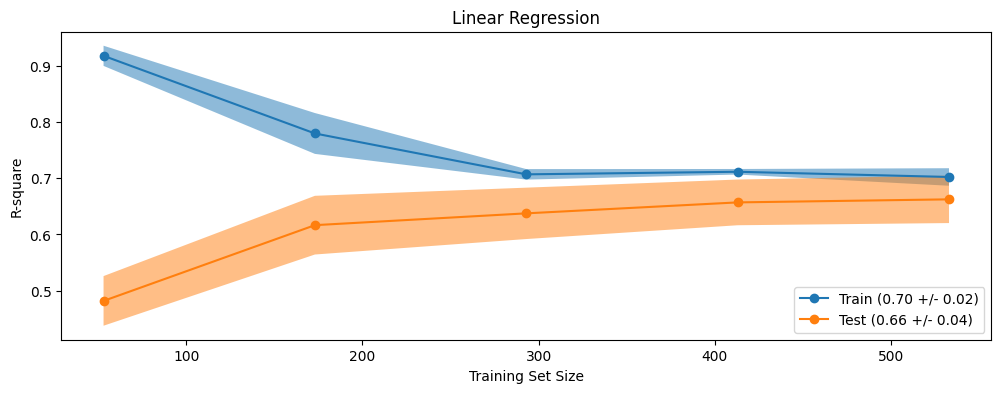

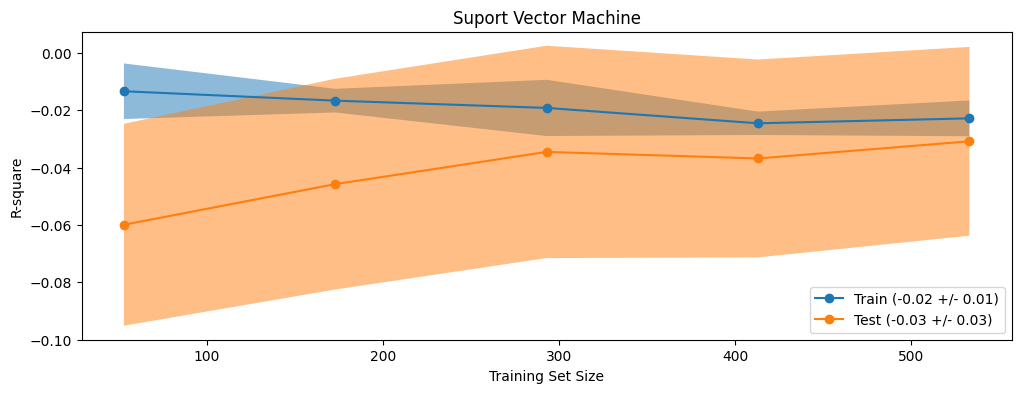

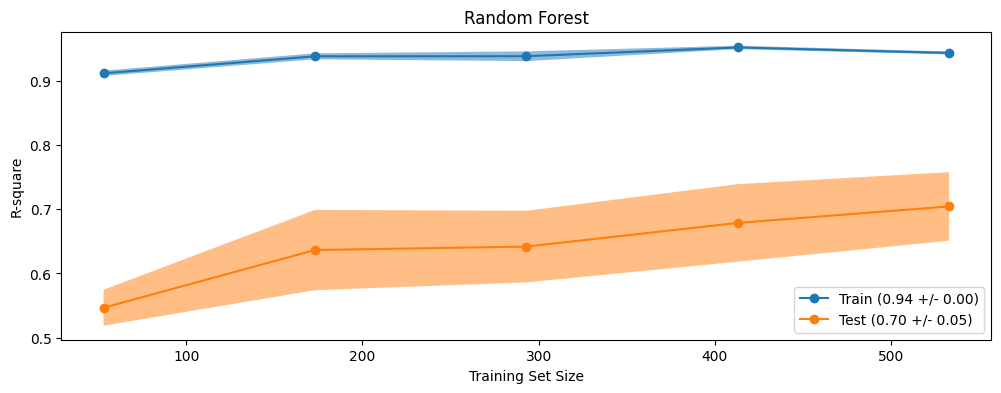

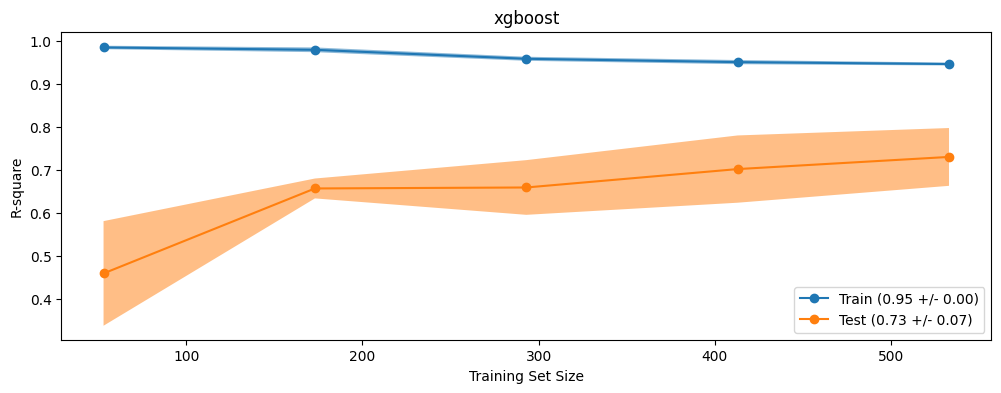

In [34]:
for name,alg in algotihms.items():
    plot_learning_curves(name,alg)

Model Training

In [35]:
model=Pipeline(steps=[
    ("Pre",preprocessor),
    ("rf",RandomForestRegressor(n_estimators=10))
])

In [36]:
model.fit(X_data,y_data)

Pipeline(steps=[('Pre',
                 ColumnTransformer(transformers=[('Num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('Cat',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source',
                                                   '...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['date_of_journey']),
                                                 ('time',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Extractor',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed')),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['dep_time',
                                                   'arrival_time'])])),
                ('rf', RandomForestRegressor(n_estimators=10))])

Model Evaluation

In [37]:
def model_evalueation(X,y):
    y_pred=model.predict(X)
    return r2_score(y,y_pred)

In [38]:
print(f"r2 score on train data is = {model_evalueation(X_data,y_data)}")

r2 score on train data is = 0.9589924824545436


In [39]:
print(f"r2 score on train data is = {model_evalueation(X_test,y_test)}")

r2 score on train data is = 0.702303540895915


Model Persistance

In [40]:
joblib.dump(model,"model.joblib")

['model.joblib']

In [41]:
saved_model=joblib.load("model.joblib")

In [42]:
saved_model

Pipeline(steps=[('Pre',
                 ColumnTransformer(transformers=[('Num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('Cat',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source',
                                                   '...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['date_of_journey']),
                                                 ('time',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Extractor',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed')),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['dep_time',
                                                   'arrival_time'])])),
                ('rf', RandomForestRegressor(n_estimators=10))])

In [43]:
y_pred=saved_model.predict(X_test)
r2_score(y_test,y_pred)

0.702303540895915